In [1]:
import numpy as np
from scipy.optimize import show_options, minimize, BFGS
import plotly.graph_objects as go
import math

In [2]:
np.set_printoptions(edgeitems=30, linewidth=100000, precision=3)

# Unconstrainted Minimization

### Rosenbrock function

This is a non-convex function designed for testing optmization solvers. The original 2D version is as follows:

$$
f(x, y) = b(y - x^2)^2 + (a - x)^2
$$

Typically, $a = 1$ and $b = 100$.

$$
f(x, y) = 100(y - x^2)^2 + (1 - x)^2
$$

As can be seen from the plot below, the minima is at $x=1$ and $y=1$ for which $f(x,y) = 0$.

In [3]:
def rosen2d(x, y):
    a, b = 1, 100
    return b*(y - x**2)**2 + (a - x)**2

In [4]:
x = np.linspace(-2, 2, 50)
y = np.linspace(-1.5, 3, 50)

In [5]:
z = np.zeros((50, 50))

In [6]:
for i in range(50):
    for j in range(50):
        x_ = x[i]
        y_ = y[j]
        z_ = rosen2d(x_, y_)
        z[i, j] = z_

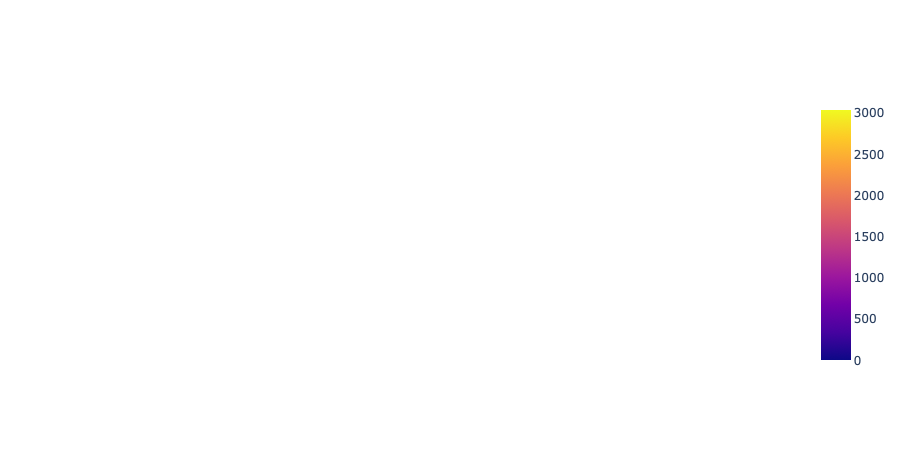

In [7]:
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.show()

In [8]:
rosen2d(1, 1)

0

As can be seen in the documentation of [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) we need at the very least specify the function we want to minimize and the initial guess. 

The callable definition is a bit different from `rosen2d` as it has been defined above. In general the callable is a vector function, i.e., it takes in a vector and outputs a scalar. Concretely, it takes in a 1-D array with shape `(n,)` instead of `x` and `y`. `rosen2d_to_min` is the redefinition of `rosen2d` per the callable specs. The initial guess plays the dual role of giving a starting point to the solver as well as specifying the size of `n`.

A lot of minimize methods will need the Jacobian of the callable and some will even need the Hessian. There are a couple of methods like Nelder-Mead and Powell that do not need the derivatives. They are good for simple functions and take longer than others to converge.

In [9]:
def rosen2d_to_min(x):
    x, y = x[0], x[1]
    return rosen2d(x, y)

Now lets see what `options` is all about when we use the Nelder-Mead method.

In [10]:
show_options(solver="minimize", method="Nelder-Mead")

Minimization of scalar function of one or more variables using the
Nelder-Mead algorithm.

Options
-------
disp : bool
    Set to True to print convergence messages.
maxiter, maxfev : int
    Maximum allowed number of iterations and function evaluations.
    Will default to ``N*200``, where ``N`` is the number of
    variables, if neither `maxiter` or `maxfev` is set. If both
    `maxiter` and `maxfev` are set, minimization will stop at the
    first reached.
return_all : bool, optional
    Set to True to return a list of the best solution at each of the
    iterations.
initial_simplex : array_like of shape (N + 1, N)
    Initial simplex. If given, overrides `x0`.
    ``initial_simplex[j,:]`` should contain the coordinates of
    the jth vertex of the ``N+1`` vertices in the simplex, where
    ``N`` is the dimension.
xatol : float, optional
    Absolute error in xopt between iterations that is acceptable for
    convergence.
fatol : number, optional
    Absolute error in func(xopt) bet

In [11]:
initial_guess = np.array([10, 10])
minima = minimize(
    rosen2d_to_min, 
    initial_guess, 
    method="Nelder-Mead", 
    options={
        "xatol": 1e-8,
        "disp": True
    }
)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 160
         Function evaluations: 296


In [12]:
minima

 final_simplex: (array([[1., 1.],
       [1., 1.],
       [1., 1.]]), array([2.398e-18, 7.302e-18, 1.181e-17]))
           fun: 2.397677395407187e-18
       message: 'Optimization terminated successfully.'
          nfev: 296
           nit: 160
        status: 0
       success: True
             x: array([1., 1.])

In [13]:
show_options(solver="minimize", method="Powell")

Minimization of scalar function of one or more variables using the
modified Powell algorithm.

Options
-------
disp : bool
    Set to True to print convergence messages.
xtol : float
    Relative error in solution `xopt` acceptable for convergence.
ftol : float
    Relative error in ``fun(xopt)`` acceptable for convergence.
maxiter, maxfev : int
    Maximum allowed number of iterations and function evaluations.
    Will default to ``N*1000``, where ``N`` is the number of
    variables, if neither `maxiter` or `maxfev` is set. If both
    `maxiter` and `maxfev` are set, minimization will stop at the
    first reached.
direc : ndarray
    Initial set of direction vectors for the Powell method.
return_all : bool, optional
    Set to True to return a list of the best solution at each of the
    iterations.
bounds : `Bounds`
    If bounds are not provided, then an unbounded line search will be used.
    If bounds are provided and the initial guess is within the bounds, then
    every functi

In [14]:
initial_guess = np.array([10, 10])
minima = minimize(
    rosen2d_to_min, 
    initial_guess, 
    method="Powell", 
    options={
        "disp": True,
        "xtol": 1e-8
    }
)

Optimization terminated successfully.
         Current function value: 2.490378
         Iterations: 14
         Function evaluations: 532


In [15]:
minima

   direc: array([[-0.014, -0.082],
       [-0.533, -3.084]])
     fun: 2.4903782983328244
 message: 'Optimization terminated successfully.'
    nfev: 532
     nit: 14
  status: 0
 success: True
       x: array([2.561, 6.534])

Because the initial guess was too far away, the solver did not find the global minima. Lets try with a closer initial guess.

In [16]:
initial_guess = np.array([5, 5])
minima = minimize(
    rosen2d_to_min, 
    initial_guess, 
    method="Powell", 
    options={
        "disp": True,
        "xtol": 1e-8
    }
)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 914


In [17]:
minima

   direc: array([[-3.801e-02, -7.432e-02],
       [ 5.260e-11,  1.170e-10]])
     fun: 6.808855688188858e-29
 message: 'Optimization terminated successfully.'
    nfev: 914
     nit: 24
  status: 0
 success: True
       x: array([1., 1.])

### Generalized Rosenbrock Function

The generalized form of the Rosenbrock function with N-dimensional input is as follows:

$$
f(\mathbf x) = \sum_{i=1}^{N-1} 100 (x_{i+1} - x_i^2)^2 + (1-x_i)^2
$$

The Jacobian of this function is -

$$
\frac{\partial f}{\partial x_j} = 200\left( x_j - x_{j-1}^2 \right) - 400 x_j \left( x_{j+1} - x_j^2 \right) - 2(1 - x_j)
$$

In [18]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def d_rosen(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [19]:
initial_guess = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
minima = minimize(
    rosen, 
    initial_guess,
    method="BFGS",
    jac=d_rosen,
    options={"disp": True}
)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


In [20]:
minima

      fun: 4.0130879949972905e-13
 hess_inv: array([[0.008, 0.012, 0.023, 0.046, 0.092],
       [0.012, 0.025, 0.047, 0.093, 0.186],
       [0.023, 0.047, 0.095, 0.187, 0.373],
       [0.046, 0.093, 0.187, 0.374, 0.746],
       [0.092, 0.186, 0.373, 0.746, 1.494]])
      jac: array([-5.690e-06, -2.733e-06, -2.545e-06, -7.735e-06,  5.781e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([1., 1., 1., 1., 1.])

There are a bunch of other even faster methods like Newton-CG, Trust-NCG, etc. that also need the Hessian in addition to the Jacobian and they converge even faster.

The full working of Hessian of the Rosenbrock function is given in [Scipy optimization tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize).

In [21]:
def d2_rosen(x):
    """Calculate the Hessian of the generalized Rosenbrock function"""
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H